In [1]:
from cluster_analitics import optim as op
from cluster_analitics.analitics import ReductionDim, Analisis
from cluster_analitics import plotter as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import random as rn
import json

2022-05-03 11:06:15.767350: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-03 11:06:15.767853: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import pandas as pd
import numpy as np
import random
random.seed(1)
def balancedCut(df ,n ,frac = [0.5], target = 'Class',classes=[0,1]):
    print(f'{"="*50}\nbalancedCut\n{"="*50}')
    print(f'Realizando seleccion de la muestra la muestra')
    newDfs = []
    if sum(frac) > 1:
        print(f'Valor de la fraccion incorrecto: --> {sum(frac)} > 1')
        
    if len(frac) < len(classes):
        frac.append(1-sum(frac))
    
    for cl,fc in zip(classes, frac):
        ndf = df[df[target]==cl]
        ro = ndf.shape[0]
        print(f'Dataset de clase --> {cl}')
        if int(fc*n) > ro:
            newDfs.append(ndf)
            print(f'\tFilas: {ro}')
        else:
            newDfs.append(ndf.sample(n=int(fc*n)))
            print(f'\tFilas: {int(fc*n)}')
    
    return pd.concat(newDfs), newDfs[1].shape[0]/newDfs[0].shape[0]

In [3]:
random.seed(1)
cards = pd.read_csv("./creditcard.csv")
cards = cards.sample(frac=1)


cards.head()

df, frac = balancedCut(cards, 30000, frac=[0.9])
scaler = StandardScaler()
x = df.iloc[:,0:-1].to_numpy()

y = df.iloc[:,-1].to_numpy() 

x = scaler.fit_transform(x)

balancedCut
Realizando seleccion de la muestra la muestra
Dataset de clase --> 0
	Filas: 27000
Dataset de clase --> 1
	Filas: 492


In [4]:
frac

0.018222222222222223

In [5]:
reduccion={'encoder':{'capas':[[512,128]], 'finalDim':4, 'batch_size':4, 'epochs':50 }}

In [6]:
modelos = {'isoForest':{'contamination':[0.2, frac,0.01,0.015]}}

In [7]:
# seed
#    999
#    888

#rn.set_seed(888)
obj = op.main(x,y,reduccion=reduccion,analisis=modelos)

2022-05-03 11:06:46.525223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-03 11:06:46.526042: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-03 11:06:46.526196: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (L-1802005): /proc/driver/nvidia/version does not exist
2022-05-03 11:06:46.528221: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
6873/6873 [==============================] - 52s 7ms/step - loss: 0.9011 - val_loss: 0.8841
Epoch 2/50
6873/6873 [==============================] - 57s 8ms/step - loss: 0.8760 - val_loss: 0.8817
Epoch 3/50
6873/6873 [==============================] - 53s 8ms/step - loss: 0.8720 - val_loss: 0.8752
Epoch 4/50
6873/6873 [==============================] - 47s 7ms/step - loss: 0.8720 - val_loss: 0.8708
Epoch 5/50
6873/6873 [==============================] - 53s 8ms/step - loss: 0.8740 - val_loss: 0.8765
Epoch 6/50
6873/6873 [==============================] - 51s 7ms/step - loss: 0.8733 - val_loss: 0.8722
Epoch 7/50
6873/6873 [==============================] - 43s 6ms/step - loss: 0.8736 - val_loss: 0.8690
Epoch 8/50
6873/6873 [==============================] - 44s 6ms/step - loss: 0.8730 - val_loss: 0.8764
Epoch 9/50
6873/6873 [==============================] - 45s 7ms/step - loss: 0.8765 - val_loss: 0.8756
Epoch 10/50
6873/6873 [==============================] - 43s 6ms/step - l

In [8]:
precision = []
recall = []
for o in obj:
    precision.append(o.precision())
    recall.append(o.recall())

plt.precisionRecall(precision,recall, engine = 'plotly')

0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 128)               640       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-tr

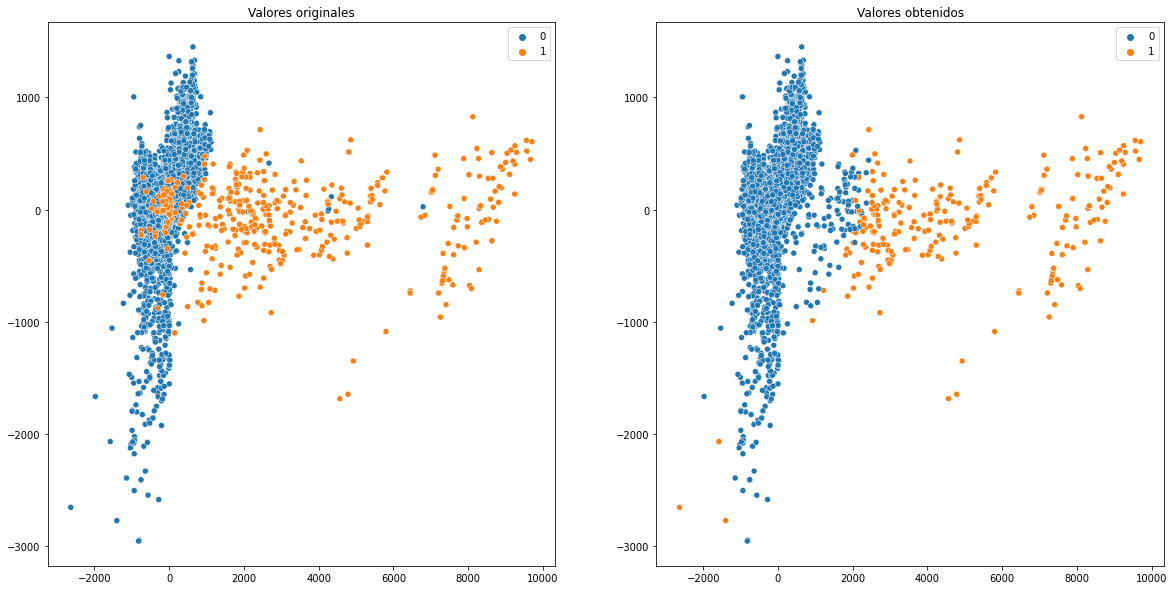

1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 128)               640       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-tr

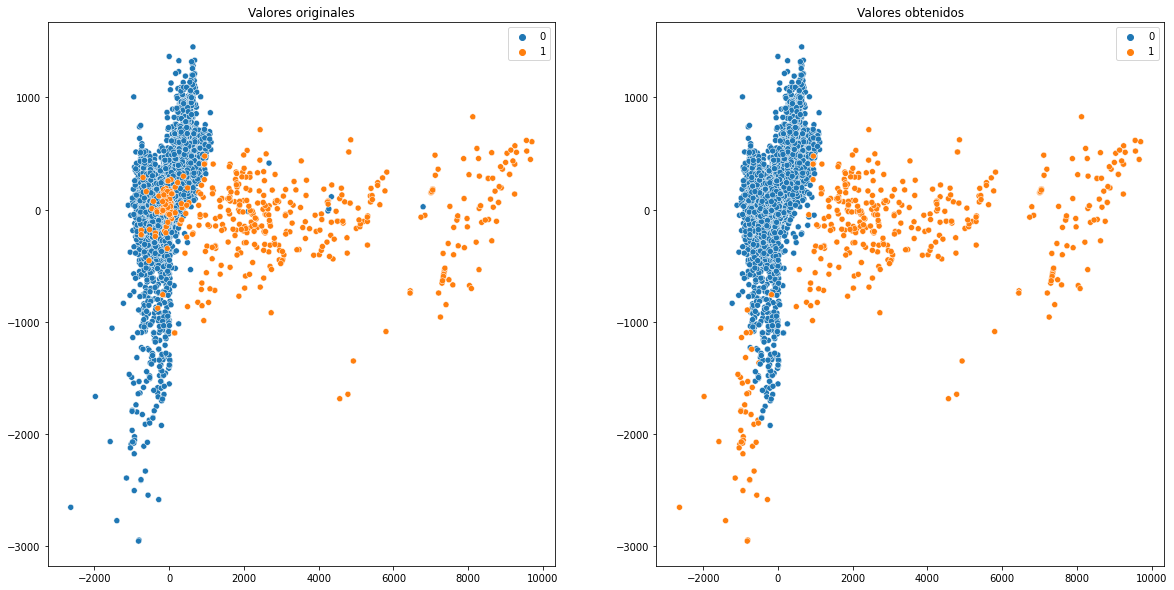

2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 128)               640       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-tr

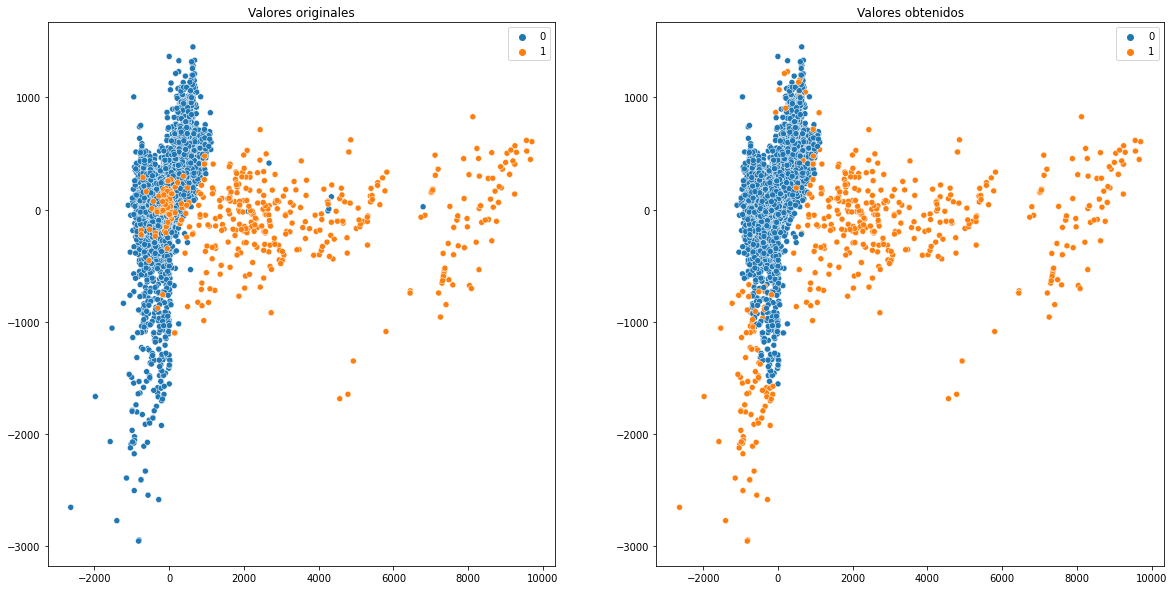

3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 bottleneck (Dense)          (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 128)               640       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 30)                15390     
                                                                 
Total params: 164,130
Trainable params: 164,130
Non-tr

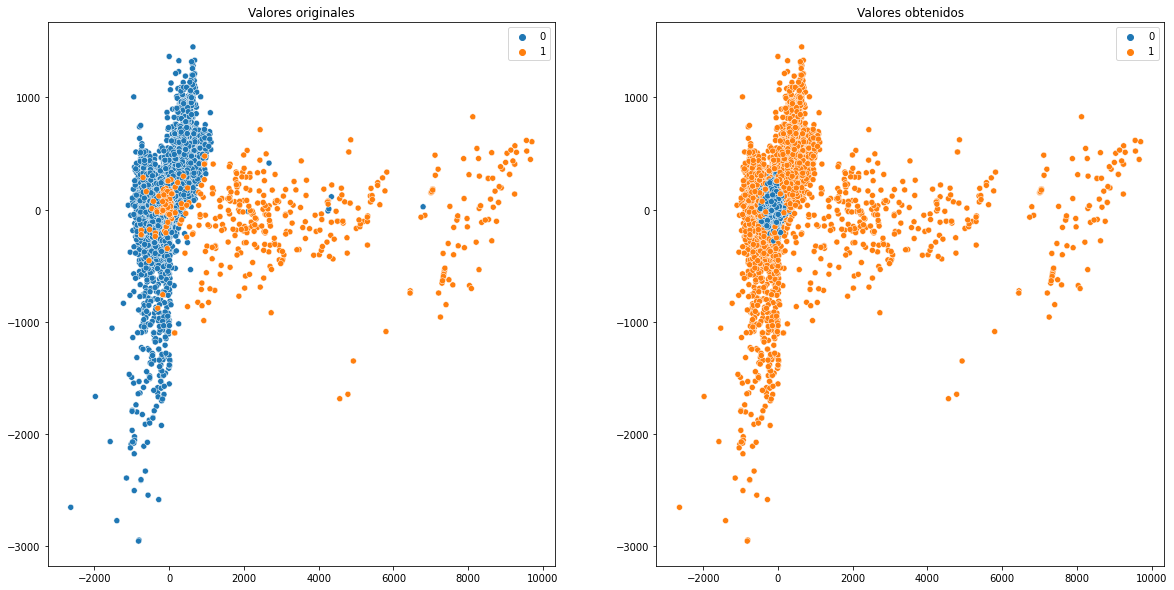

In [9]:
new = []
for n in range(0, len(obj)):
    print(n)
    print(obj[n],'\n',f'Precision: {obj[n].precision()}',f'\n Recall: {obj[n].recall()}\n' )
    
    print('='*75)
    print('|',' '*71,'|')
    print('='*75)
    x_final = obj[n].reduccion.predict()
    obj[n].analisis.setX(x_final)
    y_pred = obj[n].analisis.fit_predict()
    plt.compPlot(x_final,y,y_pred,dim=2, engine='seaborn')

In [10]:
bueno = obj[0]

x_n, y_n = bueno.predictXY()

plt.probPlot(x_n,y_n)

In [11]:
from typing import NoReturn, Union, List
from mlxtend.classifier import EnsembleVoteClassifier
from umap import UMAP

In [12]:
obj[0].analisis

In [20]:
len(x_n)

27492

In [56]:
hard_vot = EnsembleVoteClassifier([obj[0].analisis,obj[1].analisis,obj[2].analisis], fit_base_estimators=False)

hard_vot.fit(x_n,y=np.arange(len(x_n)))

/home/vcalzada/Work/proyecto/.proPy/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning:

fit_base_estimators=False enforces use_clones to be `False`



EnsembleVoteClassifier(clfs=[<cluster_analitics.analitics.Analisis object at 0x7f049c25dc10>,
                       fit_base_estimators=False, use_clones=False)

In [49]:
y_final=hard_vot.predict(X=x_n)

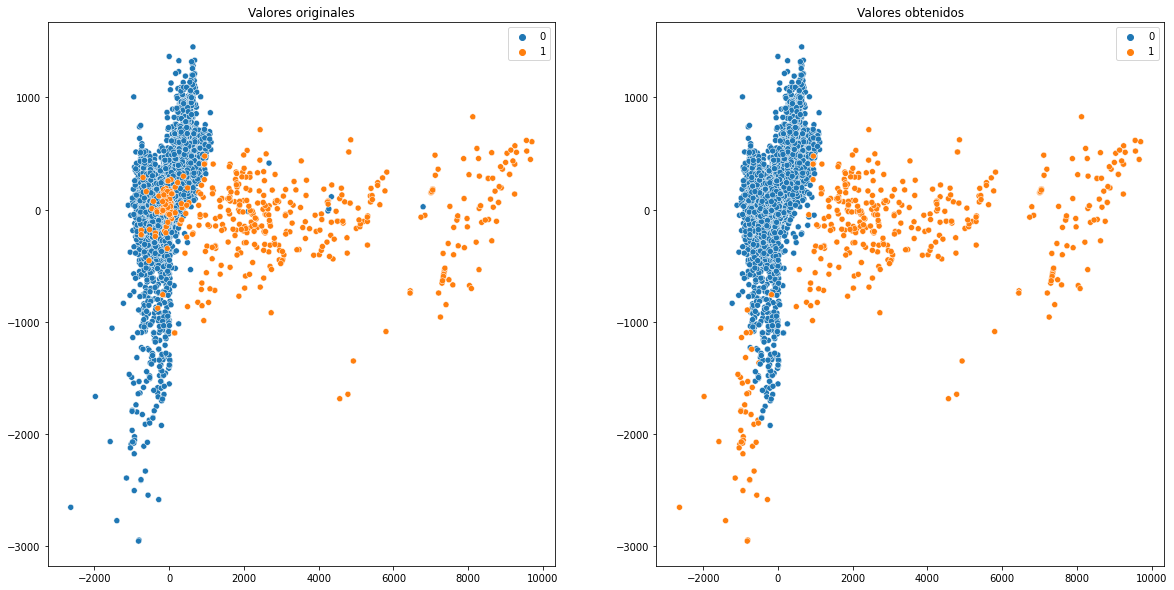

In [50]:
plt.compPlot(x_n,y,hard_vot.predict(x_n),dim=2, engine='seaborn')

In [61]:
wei_hard_vot = EnsembleVoteClassifier([obj[0].analisis,obj[1].analisis,obj[2].analisis], weights=[
        1,
        1,
        0.1
    ], fit_base_estimators=False)
wei_hard_vot.fit(x_n, y)

/home/vcalzada/Work/proyecto/.proPy/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning:

fit_base_estimators=False enforces use_clones to be `False`



EnsembleVoteClassifier(clfs=[<cluster_analitics.analitics.Analisis object at 0x7f049c25dc10>,
                       fit_base_estimators=False, use_clones=False,
                       weights=[1, 1, 0.1])

In [62]:
y_final_wei=wei_hard_vot.predict(X=x_n)

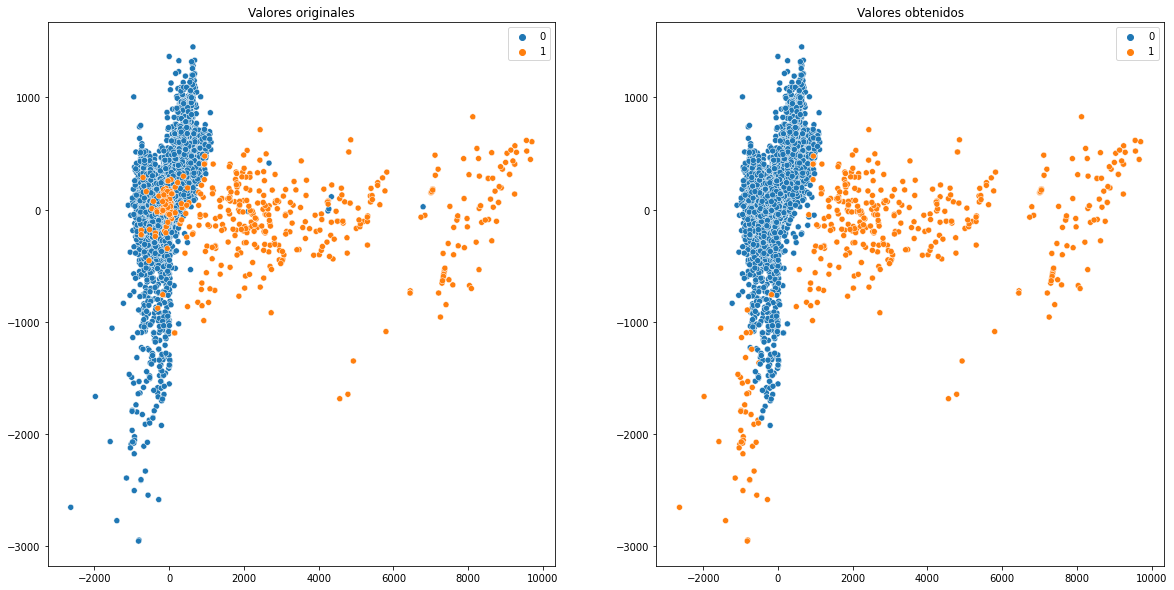

In [63]:
plt.compPlot(x_n,y,y_final_wei,dim=2, engine='seaborn')

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y,y_final))
print("\n","-"*50,"\n")
print(classification_report(y,y_final_wei))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27000
           1       0.87      0.73      0.80       492

    accuracy                           0.99     27492
   macro avg       0.93      0.86      0.90     27492
weighted avg       0.99      0.99      0.99     27492


 -------------------------------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27000
           1       0.87      0.73      0.80       492

    accuracy                           0.99     27492
   macro avg       0.93      0.86      0.90     27492
weighted avg       0.99      0.99      0.99     27492

